# Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
- Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
- 불필요한 속성 칼럼 삭제
- 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수


### 컬럼 정보
survived : 생존여부(1: 생존, 0 : 사망)
pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
name : 승객 이름
sex : 승객 성별
age : 승객 나이
sibsp : 동반한 형제자매, 배우자 수
parch : 동반한 부모, 자식 수
ticket : 티켓의 고유 넘버
fare 티켓의 요금
cabin : 객실 번호
embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
boat
body
home.dest


모델 성능 개선 및 평가
데이터셋 개선을 위한 검토사항 예시
변수 = 'age_cat','male','female','fare_cat','family',{town_C','town_Q','town_S'}
age의 Null 값을 평균값으로 대체하면 전체적인 데이터의 왜곡이 심함을 확인
pclass는 fare_cat이랑 같이 모델에 넣을 경우 정확도가 떨어지고(0.82) 각각 넣었을 때는 fare_cat을 넣었을 때의 정확도가 더 높음(0.82, 3% 차이). 이상치에 가까울 정도로 요금이 높은 사람의 경우 사망률이 3클래스 승객과 비슷한 수치를 보이는 점이 pclass 변수에서는 반영이 되지 않았던 것이 원인으로 추측
sex, embarked 변수로 집어넣은 것보다 원핫 인코더(dummies)로 처리해서 넣는 것이 정확도를 대략 5% 정도 높여주며 디시전 트리의 분기를 더 쉽게하는 효과 확인
parch와 sibsp를 각각 변수에 적용하면 의미 있는 양상이 보이지 않고 정확도를 떨어뜨리지만 두 변수를 합쳐서 family라는 파생변수를 생성하면 생존율이 높은 여성 승객일지라도 가족 구성원 수가 많으면 생존율이 낮아지는 것을 확인
전처리 내역 예시

age null 처리방법 변경 : 평균값 대체 > 삭제
pclass와 fare_cat중 분석변수 선택
embarked 원핫인코딩

In [365]:
import pandas as pd

tit = pd.read_csv('dataset/titanic3.csv')
tit.head()
tit2 = tit.copy()

In [366]:
df1 = tit2[['survived','age']]
drop_df1 = df1.dropna(subset=['age'],how='any',axis=0)
df1['age'] = df1.age.fillna(df1.age.mean())

<ipython-input-366-1b345b58ff25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1.age.fillna(df1.age.mean())


범주화 age,fare => 전처리 시 고려

In [367]:
import numpy as np

df2 = tit.copy()
print(df2.isnull().sum())
df2.head()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [368]:
ticket , boat , body, home.dest name

SyntaxError: invalid syntax (<ipython-input-368-0d0756323544>, line 1)

In [369]:
# 필요없는칼럼들 삭제
# df2.drop(['ticket','boat','body','home.dest','name','cabin'],axis=1,inplace=True)

#embarked fare 비교해서 각각 유사한값에 넣어주기

fe = df2[['fare','embarked']]
# fe.dropna(inplace=True)
# fe.isnull().sum()
fe.embarked.unique()
e_null_f = fe[(fe['embarked'].isnull()==1)]['fare']

In [370]:
f_null_e = fe[(fe['fare'].isnull()==1)][['embarked']]

In [371]:
f_null_e

,embarked
1225,S


fare                                                              \
          count       mean        std     min      25%       50%        75%   
embarked                                                                      
C         270.0  62.336267  84.185996  4.0125  13.8583  28.51875  78.966675   
Q         123.0  12.409012  13.616133  6.7500   7.7500   7.75000  10.197900   
S         913.0  27.418824  37.096402  0.0000   8.0500  13.00000  27.750000   

                    
               max  
embarked            
C         512.3292  
Q          90.0000  
S         263.0000

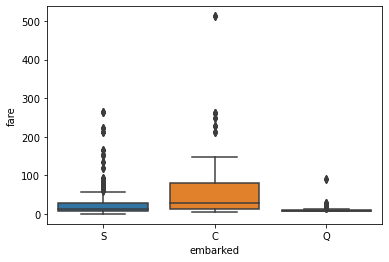

In [372]:
# fare랑 cabin 비교 해서 cabin
# 이상치 제거하고 median 찾아서 e_null_f 에 맞춰서 null값 채워주기
fe2 = fe.dropna()

sns.boxplot(x='embarked',y='fare',data=fe2)
fe2.groupby('embarked').describe()

In [373]:
def outlier(x):
    q1 = x['fare'].describe()['25%']
    q3 = x['fare'].describe()['75%']

    iqr = q3-q1
    out = x[(x['fare'] < (q1 - iqr*1.5)) | (x['fare'] > (q3 + iqr*1.5))]
    
    return out

fare                                                             \
          count       mean        std     min        25%      50%      75%   
embarked                                                                     
C         246.0  40.679524  37.820879  4.0125  12.184375  27.7208  61.9792   
Q          98.0   8.003658   1.100529  6.7500   7.750000   7.7500   7.7719   
S         821.0  17.581271  12.759558  0.0000   7.925000  13.0000  26.0000   

                    
               max  
embarked            
C         146.5208  
Q          12.3500  
S          57.0000

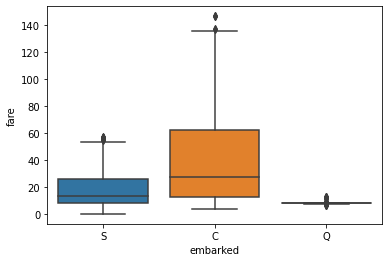

In [374]:
# 이상치 제거 통계요약표

S = fe2.groupby('embarked').get_group('S')
C = fe2.groupby('embarked').get_group('C')
Q = fe2.groupby('embarked').get_group('Q')

list1 = list(outlier(Q).index) + list(outlier(C).index) + list(outlier(S).index)

fe3 = fe2.drop(list1,axis=0)

sns.boxplot(x='embarked',y='fare',data= fe3)
fe3.groupby('embarked').describe()

In [375]:
# fare 는 S 이니 이상치 제거한 S의 평균값 fare의 nan에 채워주기
embarked_S_mean = float(fe3.groupby('embarked').get_group('S').mean())

In [376]:
df2.embarked.fillna('C',inplace=True)
df2.fare.fillna(embarked_S_mean,inplace=True)

In [377]:
# df2.isnull().sum()

# 버릴거 버리고 age 평균값 찾아보자

df2.drop(['ticket','cabin','boat','body','home.dest'],axis=1,inplace=True)

In [386]:
def name_cat(x):
    if 'Miss' in x:
        cat = 'Miss'
    elif 'Master' in x:
        cat = 'Master'
    elif 'Mrs' in x:
        cat = 'Mrs'
    elif 'Mr' in x:
        cat = 'Mr'
    return cat

In [387]:
df2.name.apply(name_cat)

UnboundLocalError: local variable 'cat' referenced before assignment

In [382]:
df2.name.unique()

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)

In [378]:
# df2.age.isnull().sum() # 263개 null값

# age_nun  = df2[(df2['age'].isnull()==1)]
# age_nun.groupby('pclass').describe()

survived                                                 age       ...  \
          count      mean       std  min  25%  50%   75%  max count mean  ...   
pclass                                                                    ...   
1          39.0  0.487179  0.506370  0.0  0.0  0.0  1.00  1.0   0.0  NaN  ...   
2          16.0  0.250000  0.447214  0.0  0.0  0.0  0.25  1.0   0.0  NaN  ...   
3         208.0  0.240385  0.428348  0.0  0.0  0.0  0.00  1.0   0.0  NaN  ...   

       parch        fare                                                \
         75%  max  count       mean        std     min    25%      50%   
pclass                                                                   
1        0.0  1.0   39.0  53.135038  51.451700  0.0000  26.55  31.6833   
2        0.0  0.0   16.0  10.154425   9.556559  0.0000   0.00  12.6125   
3        0.0  9.0  208.0  14.321133  14.879852  6.4375   7.75   7.8958   

                           
             75%      max  
pclass                     
1       52.00000  227.525  
2       15.04685   33.000  
3       15.24580   69.550  

[3 rows x 40 columns]

<AxesSubplot:xlabel='pclass', ylabel='fare'>

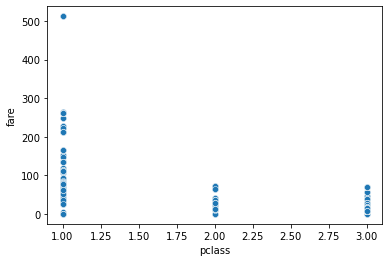

In [362]:
sns.scatterplot(x='pclass', y='fare',data=df2)

C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'mean')

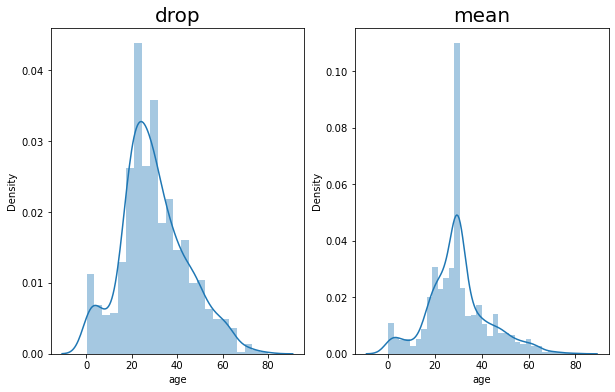

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(drop_df1.age, ax=ax1)
sns.distplot(df1.age, ax=ax2)

ax1.set_title('drop',size=20)
ax2.set_title('mean',size=20)

In [68]:
tit2.head()
tit2['home.dest'].unique()
# tit2.isnull().sum()
tit2.drop(['cabin','boat','body','home.dest','name','cabin'],axis=1,inplace=True)
tit2.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [76]:
tit2.age.fillna(tit2.age.mean(),inplace=True)
embarked_idxmax = tit2.embarked.value_counts().idxmax()
tit2.embarked.fillna(embarked_idxmax,inplace=True)
tit2.fare.fillna(tit2.fare.mean(),inplace=True)
tit2

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29.000000,0,0,24160,211.3375,S
1,1,1,male,0.920000,1,2,113781,151.5500,S
2,1,0,female,2.000000,1,2,113781,151.5500,S
3,1,0,male,30.000000,1,2,113781,151.5500,S
4,1,0,female,25.000000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,2665,14.4542,C
1305,3,0,female,29.881138,1,0,2665,14.4542,C
1306,3,0,male,26.500000,0,0,2656,7.2250,C
1307,3,0,male,27.000000,0,0,2670,7.2250,C


In [79]:
tit2.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['sex','embarked','ticket']

for i in col:
    tit2[i] = le.fit_transform(tit2[i])

In [115]:
tit2

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,0,29.000000,0,0,187,211.3375,2
1,1,1,1,0.920000,1,2,49,151.5500,2
2,1,0,0,2.000000,1,2,49,151.5500,2
3,1,0,1,30.000000,1,2,49,151.5500,2
4,1,0,0,25.000000,1,2,49,151.5500,2
...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,259,14.4542,0
1305,3,0,0,29.881138,1,0,259,14.4542,0
1306,3,0,1,26.500000,0,0,250,7.2250,0
1307,3,0,1,27.000000,0,0,264,7.2250,0


In [116]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#독립변수 종속변수 분리
y = tit2['survived'] # 종속변수
x = tit2.drop('survived',axis=1) # 독립변수

x_train, x_test , y_train , y_test = train_test_split(x, y ,test_size=0.2, random_state=11) 


In [264]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train , y_train)

rf_predict = rf.predict(x_test)
acu_rf = accuracy_score(y_test, rf_predict).round(2)



lr = LogisticRegression()
lr.fit(x_train, y_train)
lf_predict = lr.predict(x_test)
acu_lr = accuracy_score(y_test, lf_predict).round(2)
print('랜덤포레스트: {}\n로지스틱회귀: {}'.format(acu_rf,acu_lr))

랜덤포레스트: 0.81
로지스틱회귀: 0.81


C:\anaconda3\envs\cakd3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
